<a href="https://colab.research.google.com/github/jhyela/pregunta-SMART/blob/main/Preparacion_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount("/content/drive", force_remount=True)
df =pd.read_csv("drive/MyDrive/Analitica/Resultados__nicos_Saber_Pro_20240809.csv")

Mounted at /content/drive


In [42]:
datos = df[['PERIODO','ESTU_PRGM_ACADEMICO','MOD_RAZONA_CUANTITAT_PUNT','MOD_COMUNI_ESCRITA_PUNT']][(df['INST_COD_INSTITUCION'] == 1828)]
datos.reset_index(drop=True, inplace=True)

datos.describe()
datos.info()
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PERIODO                    4809 non-null   int64  
 1   ESTU_PRGM_ACADEMICO        4809 non-null   object 
 2   MOD_RAZONA_CUANTITAT_PUNT  4809 non-null   int64  
 3   MOD_COMUNI_ESCRITA_PUNT    4799 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 150.4+ KB


,PERIODO,ESTU_PRGM_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT
0,20183,ECONOMIA Y NEGOCIOS INTERNACIONALES,164,191.0
1,20183,DISEÑO INDUSTRIAL,181,161.0
2,20183,INGENIERIA INDUSTRIAL,157,166.0
3,20183,CONTADURIA PUBLICA Y FINANZAS INTERNACIONALES,173,191.0
4,20195,CIENCIA POLITICA,170,198.0


In [5]:
datos['MOD_COMUNI_ESCRITA_PUNT'].isna().sum()
datos['MOD_COMUNI_ESCRITA_PUNT'] = datos['MOD_COMUNI_ESCRITA_PUNT'].fillna(0)
datos['MOD_COMUNI_ESCRITA_PUNT'] = datos['MOD_COMUNI_ESCRITA_PUNT'].astype(int)


In [6]:
datos.describe()
datos.info()
datos.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PERIODO                    4809 non-null   int64 
 1   ESTU_PRGM_ACADEMICO        4809 non-null   object
 2   MOD_RAZONA_CUANTITAT_PUNT  4809 non-null   int64 
 3   MOD_COMUNI_ESCRITA_PUNT    4809 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 150.4+ KB


,PERIODO,ESTU_PRGM_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT
0,20183,ECONOMIA Y NEGOCIOS INTERNACIONALES,164,191
1,20183,DISEÑO INDUSTRIAL,181,161
2,20183,INGENIERIA INDUSTRIAL,157,166
3,20183,CONTADURIA PUBLICA Y FINANZAS INTERNACIONALES,173,191
4,20195,CIENCIA POLITICA,170,198


In [7]:
x = datos.groupby(['PERIODO','ESTU_PRGM_ACADEMICO'])['MOD_RAZONA_CUANTITAT_PUNT'].mean()
y = datos.groupby(['PERIODO','ESTU_PRGM_ACADEMICO'])['MOD_COMUNI_ESCRITA_PUNT'].mean()

x= pd.DataFrame(x)
y= pd.DataFrame(y)

datos1 = pd.merge(x,y, on=['PERIODO','ESTU_PRGM_ACADEMICO'])


In [8]:
datos1 = datos1.reset_index()

In [9]:
datos1.shape
datos1.info()
datos1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PERIODO                    174 non-null    int64  
 1   ESTU_PRGM_ACADEMICO        174 non-null    object 
 2   MOD_RAZONA_CUANTITAT_PUNT  174 non-null    float64
 3   MOD_COMUNI_ESCRITA_PUNT    174 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.6+ KB


,PERIODO,ESTU_PRGM_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT
0,20183,ADMINISTRACION DE EMPRESAS,174.505882,169.764706
1,20183,ANTROPOLOGIA,155.642857,179.142857
2,20183,BIOLOGIA,192.071429,181.714286
3,20183,CIENCIA POLITICA,180.590909,170.227273
4,20183,CONTADURIA PUBLICA Y FINANZAS INTERNACIONALES,184.500000,168.550000


Creamos en Label Encoder con la columna programa academico, de los datos seleccionados esta es la unica columna que podria ser candidata a se modificada por u label Encoder o por One hot encoding.

In [10]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
datos1['programa'] = labelencoder.fit_transform(datos1['ESTU_PRGM_ACADEMICO'])

In [11]:

datos1.head()
datos1.tail()

,PERIODO,ESTU_PRGM_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,programa
169,20226,MERCADEO INTERNACIONAL Y PUBLICIDAD,92.5,79.5,21
170,20226,MÚSICA,174.6,100.8,22
171,20226,PSICOLOGIA,156.0,128.5,23
172,20226,QUIMICA,218.0,185.0,24
173,20226,QUIMICA FARMACEUTICA,179.0,151.0,25


In [12]:
datos1.drop('ESTU_PRGM_ACADEMICO', axis=1, inplace=True)

In [13]:
correlaciones = datos1.groupby('PERIODO').corr()

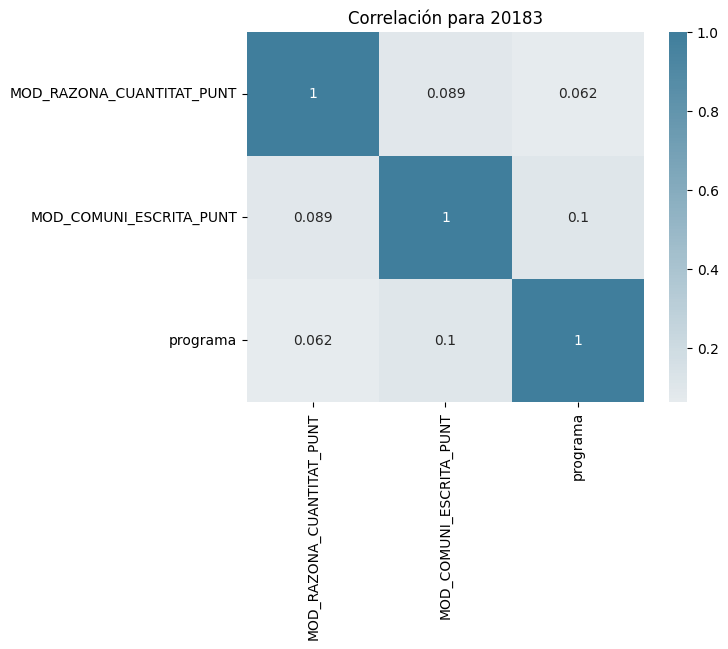

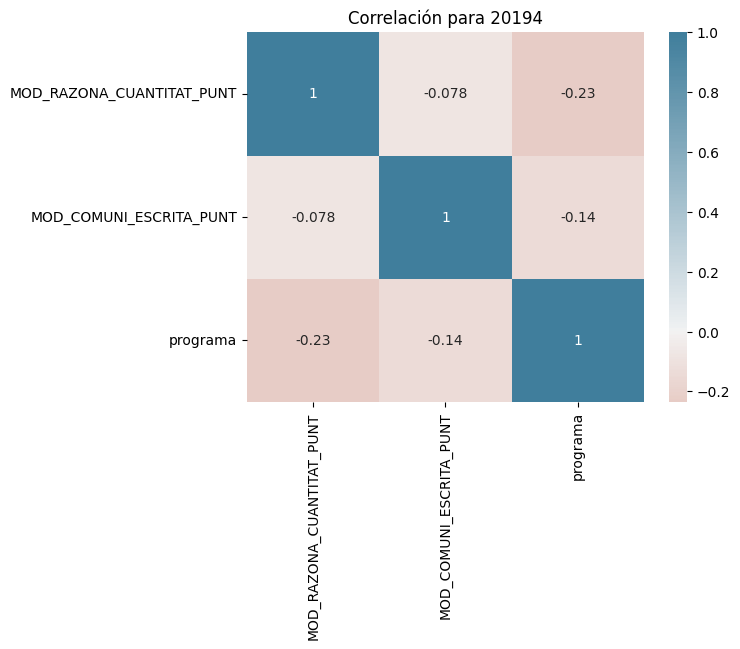

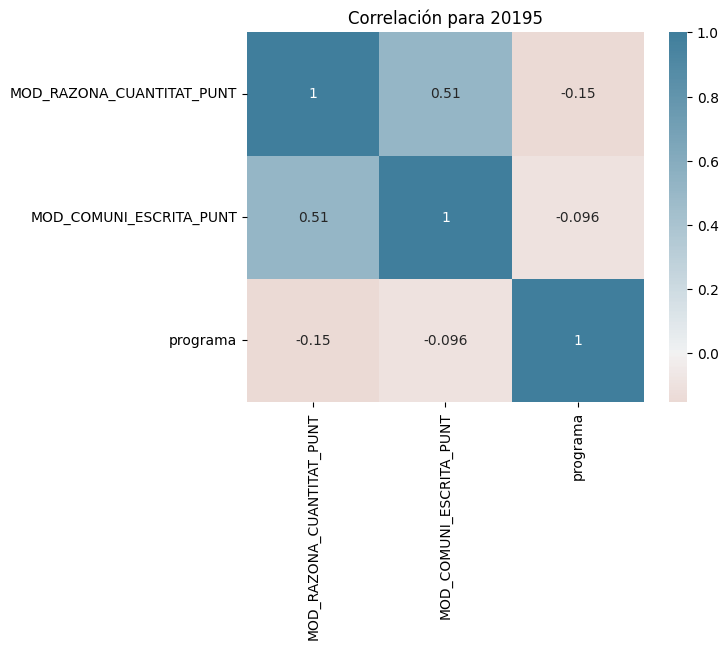

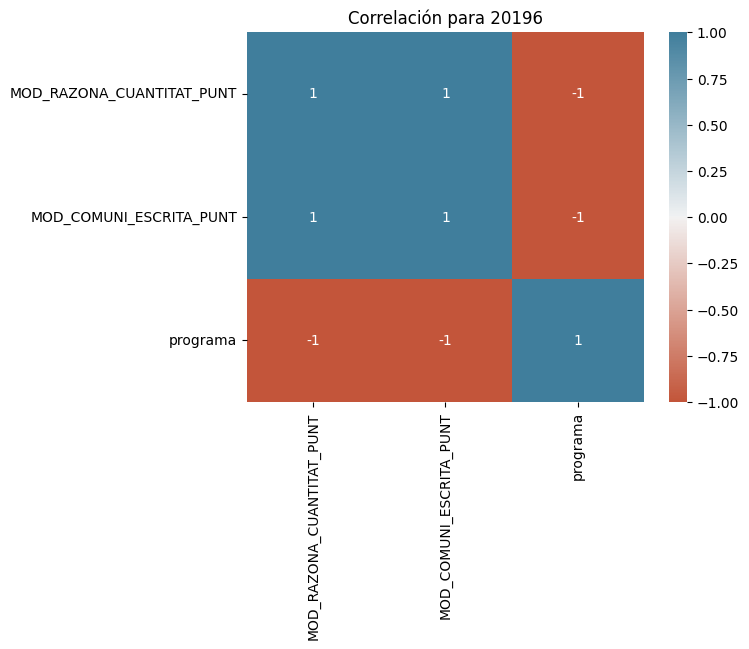

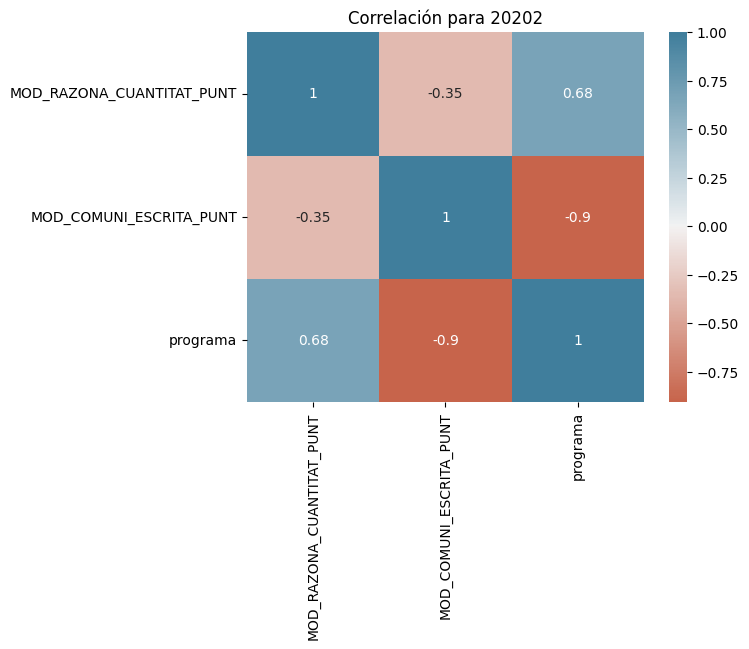

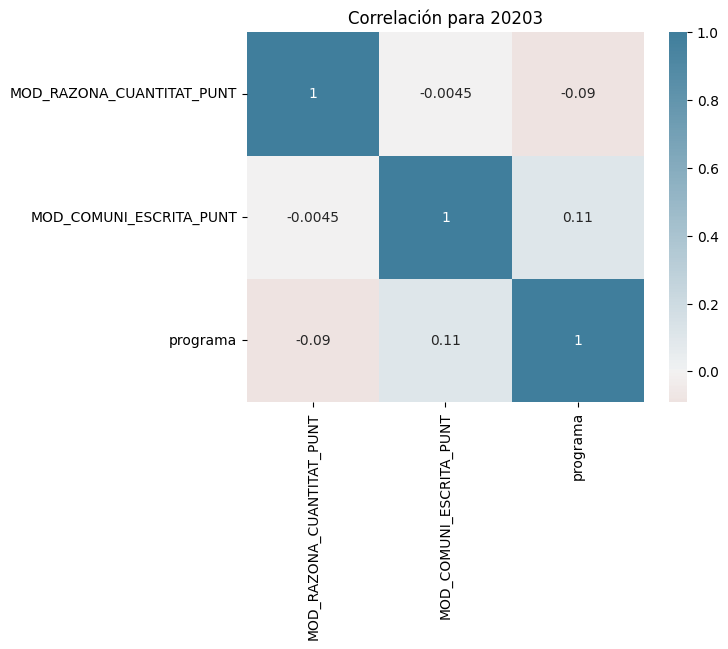

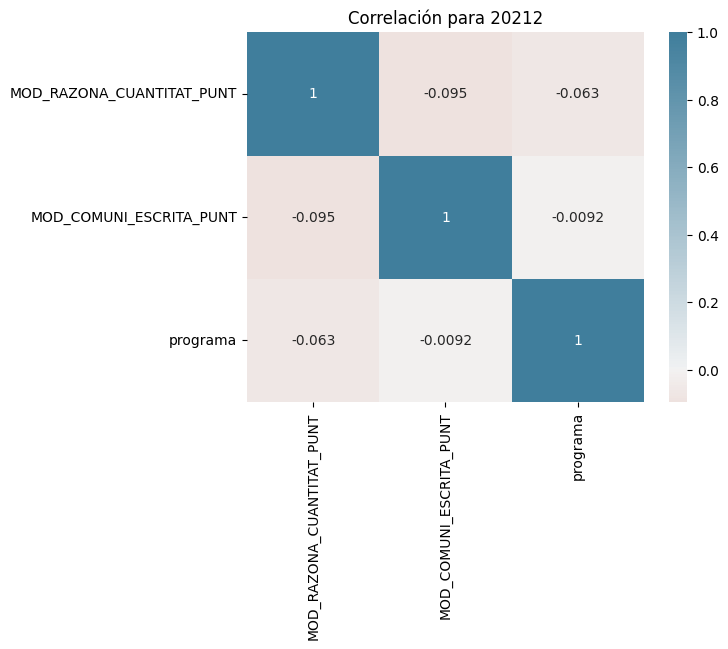

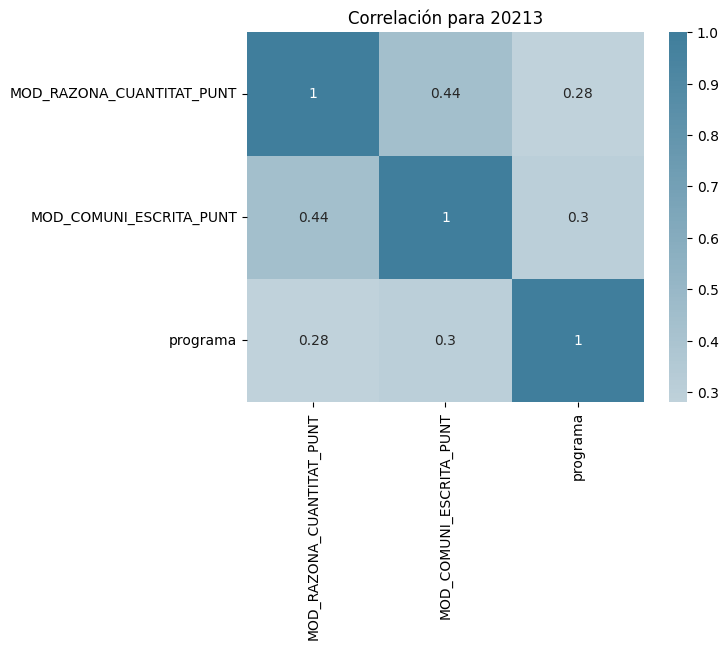

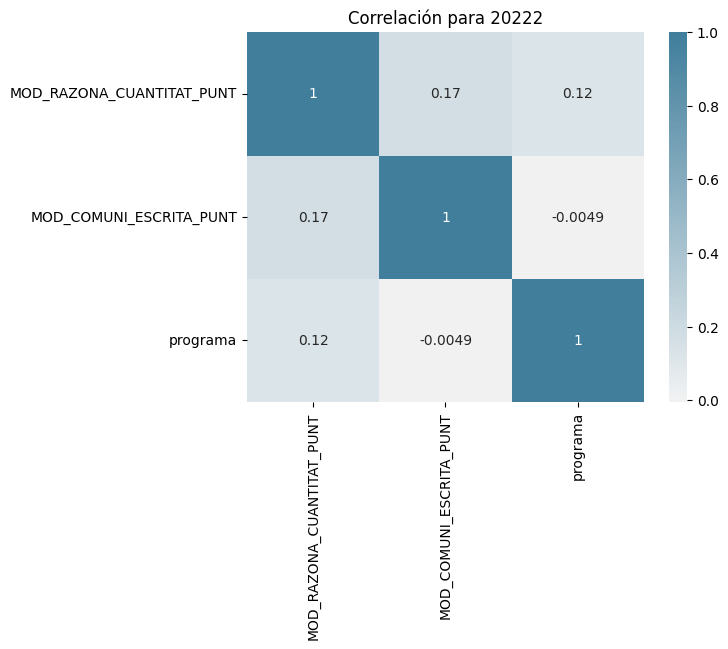

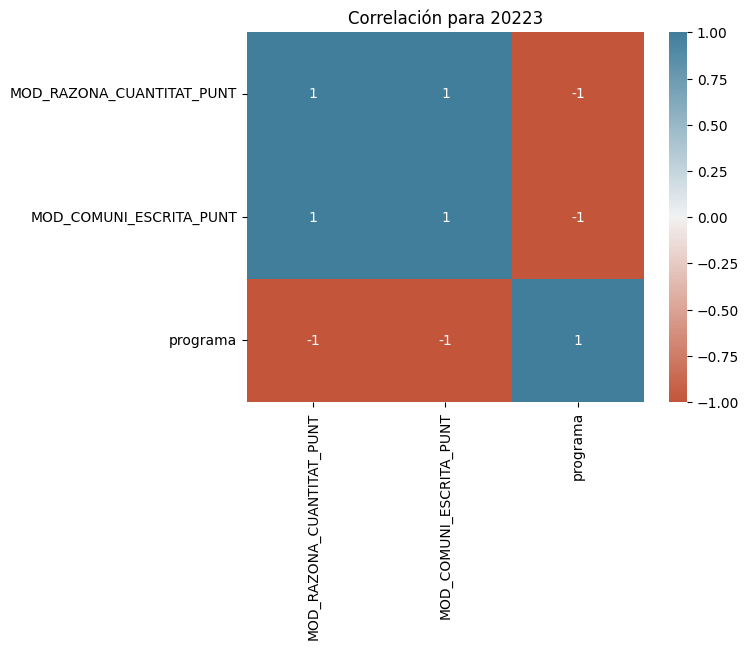

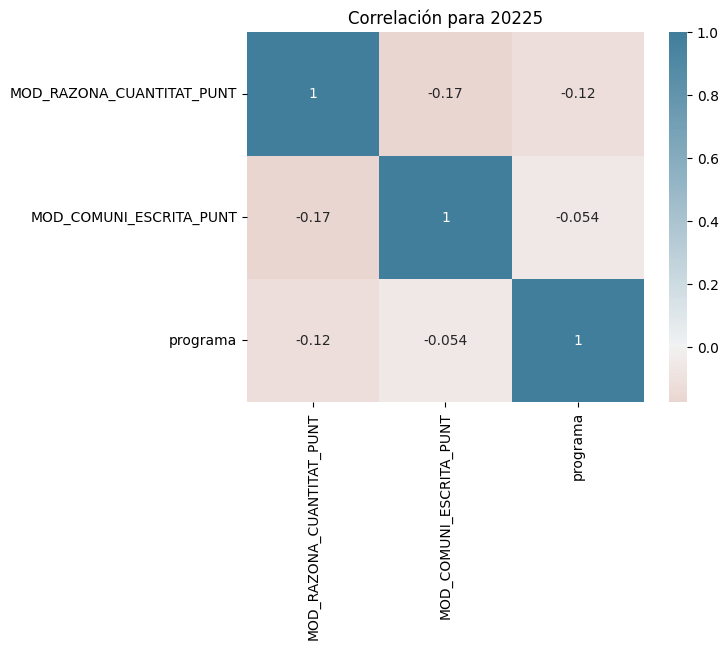

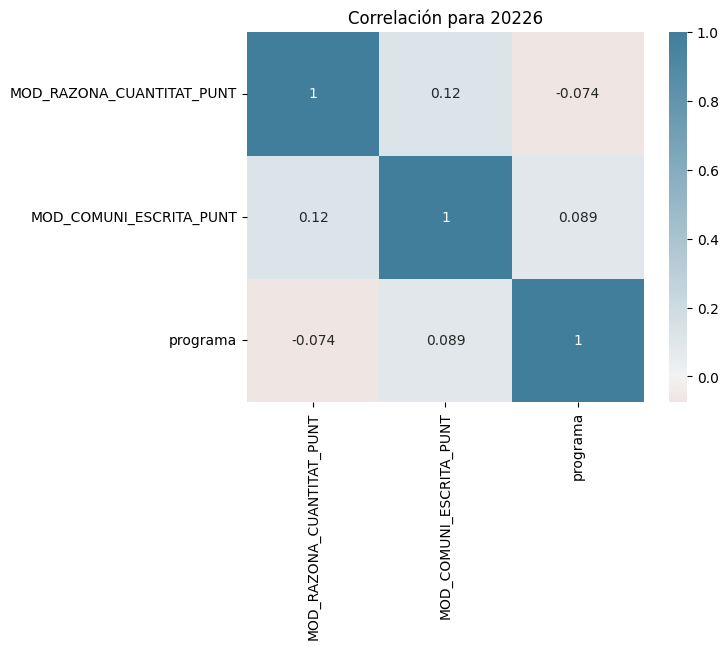

In [14]:

import matplotlib.pyplot as plt


correlaciones.dropna(inplace=True)

for programa in correlaciones.index.get_level_values(0).unique():
  df_temp = correlaciones.loc[programa]
  sns.heatmap(data=df_temp, cmap=sns.diverging_palette(20, 230, as_cmap=True), center=0, annot=True)
  plt.title(f"Correlación para {programa}")
  plt.show()


In [44]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

datos3 = datos

labelencoder = LabelEncoder()

datos3['ID_PRGM_ACADEMICO'] = labelencoder.fit_transform(datos3['ESTU_PRGM_ACADEMICO'])

datos3.drop('ESTU_PRGM_ACADEMICO', axis=1, inplace=True)

datos3.head()



,PERIODO,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,ID_PRGM_ACADEMICO
0,20183,164,191.0,9
1,20183,181,161.0,7
2,20183,157,166.0,11
3,20183,173,191.0,4
4,20195,170,198.0,3


In [50]:
scaler = MinMaxScaler()

# Ajustar y transformar los datos
normalized_data = scaler.fit_transform(datos3)

# Crear un DataFrame con los datos normalizados
normalized_df = pd.DataFrame(normalized_data, columns=datos3.columns)

normalized_df


,PERIODO,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,ID_PRGM_ACADEMICO
0,0.000000,0.546667,0.636667,0.346154
1,0.000000,0.603333,0.536667,0.269231
2,0.000000,0.523333,0.553333,0.423077
3,0.000000,0.576667,0.636667,0.153846
4,0.279070,0.566667,0.660000,0.115385
...,...,...,...,...
4804,0.906977,0.526667,0.416667,0.000000
4805,0.906977,0.456667,0.416667,0.423077
4806,0.906977,0.433333,0.553333,0.000000
4807,0.906977,0.616667,0.613333,0.000000


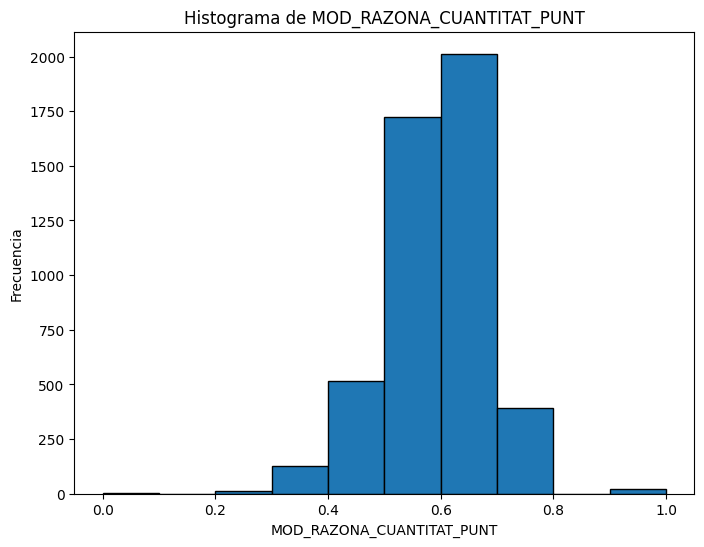

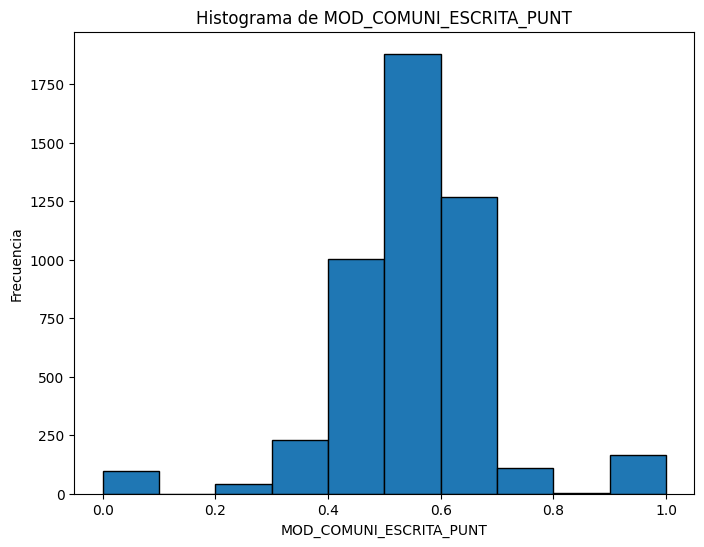

In [53]:

import matplotlib.pyplot as plt

# Histograma para MOD_RAZONA_CUANTITAT_PUNT
plt.figure(figsize=(8, 6))
plt.hist(normalized_df['MOD_RAZONA_CUANTITAT_PUNT'], bins=10, edgecolor='black')
plt.xlabel('MOD_RAZONA_CUANTITAT_PUNT')
plt.ylabel('Frecuencia')
plt.title('Histograma de MOD_RAZONA_CUANTITAT_PUNT')
plt.show()

# Histograma para MOD_COMUNI_ESCRITA_PUNT
plt.figure(figsize=(8, 6))
plt.hist(normalized_df['MOD_COMUNI_ESCRITA_PUNT'], bins=10, edgecolor='black')
plt.xlabel('MOD_COMUNI_ESCRITA_PUNT')
plt.ylabel('Frecuencia')
plt.title('Histograma de MOD_COMUNI_ESCRITA_PUNT')
plt.show()


In [48]:
normalized_df.drop(['ID_PRGM_ACADEMICO','PERIODO'], axis=1, inplace=True)
normalized_df.corr()

,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT
MOD_RAZONA_CUANTITAT_PUNT,1.000000,0.136673
MOD_COMUNI_ESCRITA_PUNT,0.136673,1.000000


Se muesra una correlación débil

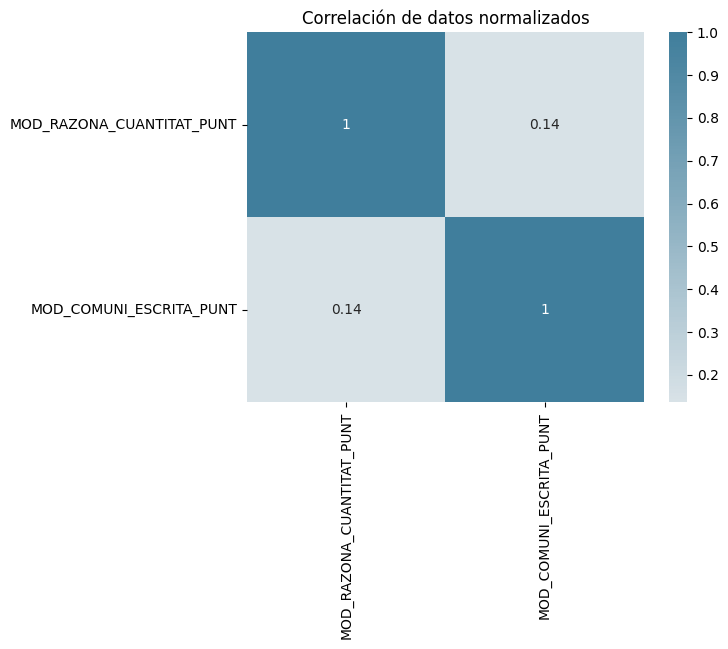

In [49]:
# prompt: heatmap normalized_data

import matplotlib.pyplot as plt
sns.heatmap(normalized_df.corr(), cmap=sns.diverging_palette(20, 230, as_cmap=True), center=0, annot=True)
plt.title("Correlación de datos normalizados")
plt.show()


#**CONCLUSIONES**

Los metodos de preparacion de datos One Hot Encoding no aplica dado que la columa categorica nombre de programa tiene muchas categorias y no aplica, el metodo Label Encoding genero unos id de categoria por cada valor distinto, crendo 22 id de cagorias pero no se ve correlacion con los datos de resultado de modulo cuantitativo y comunicacion escrite.

El metodo de Normalización de columnas suavizó los datos de MOD_RAZONA_CUANTITAT_PUNT	MOD_COMUNI_ESCRITA_PUNT pero no se alcanza a percibir una correlacion fuerte.
